# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots are displayed inline in the notebook
%matplotlib inline


Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [2]:
# Your code here
# Load the dataset with the specified index column
df = pd.read_csv('data/ames.csv', index_col=0)

# Display the first few rows of the dataframe to verify
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [3]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [4]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [5]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

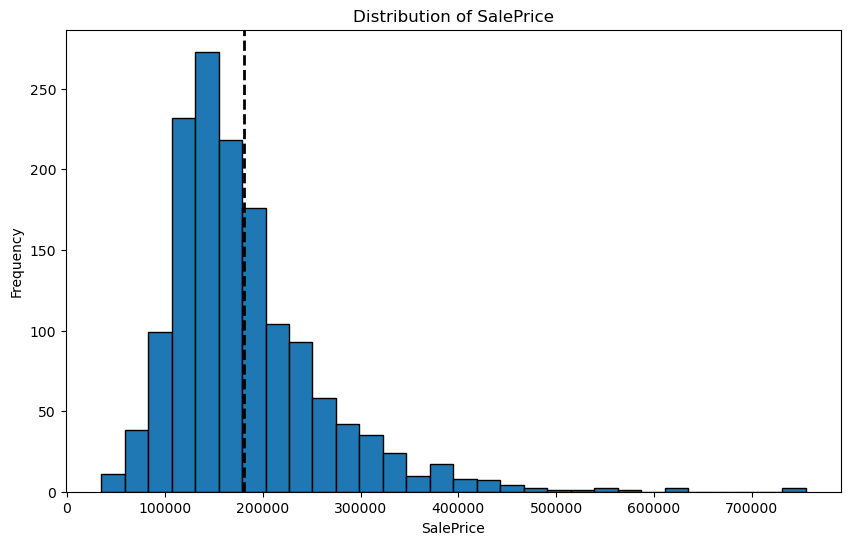

In [6]:
# Your code here
import matplotlib.pyplot as plt

# Calculate the mean of SalePrice
mean_saleprice = df['SalePrice'].mean()

# Plot the histogram for SalePrice
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=30, edgecolor='black')
plt.axvline(mean_saleprice, color='black', linestyle='dashed', linewidth=2)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


Now, print out the mean, median, and standard deviation:

In [7]:
# Your code here
# Calculate mean, median, and standard deviation for SalePrice
mean_saleprice = df['SalePrice'].mean()
median_saleprice = df['SalePrice'].median()
std_saleprice = df['SalePrice'].std()

# Print the results
print(f"Mean SalePrice: {mean_saleprice}")
print(f"Median SalePrice: {median_saleprice}")
print(f"Standard Deviation of SalePrice: {std_saleprice}")


Mean SalePrice: 180921.19589041095
Median SalePrice: 163000.0
Standard Deviation of SalePrice: 79442.50288288663


In the cell below, interpret the above information.

In [9]:
# Replace None with appropriate text
"""
 Overall, the distribution of SalePrice suggests that while most houses are sold around the median price of $163,000, there are houses with significantly higher prices that raise the mean to $180,921.20. The large standard deviation confirms the presence of a broad range of sale prices.

"""

'\n Overall, the distribution of SalePrice suggests that while most houses are sold around the median price of $163,000, there are houses with significantly higher prices that raise the mean to $180,921.20. The large standard deviation confirms the presence of a broad range of sale prices.\n\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

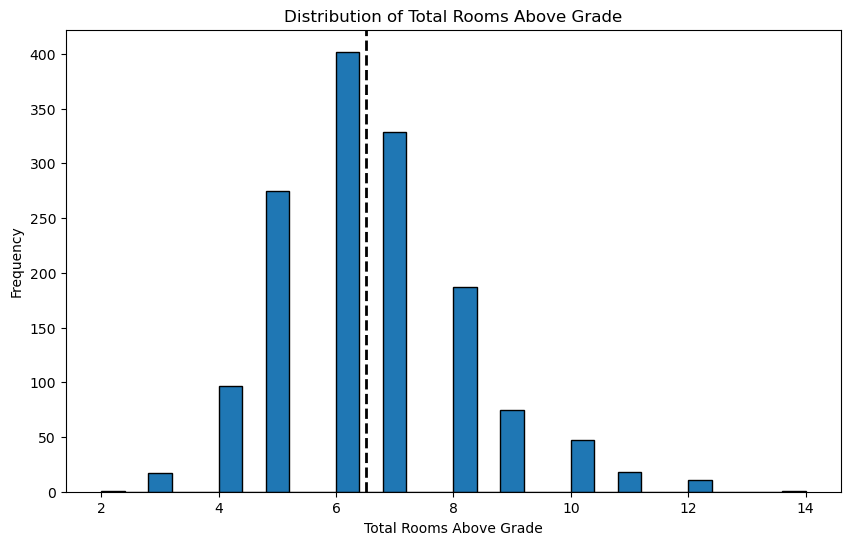

In [10]:
# Your code here
# Calculate the mean of TotRmsAbvGrd
mean_tot_rms_abv_grd = df['TotRmsAbvGrd'].mean()

# Plot the histogram for TotRmsAbvGrd
plt.figure(figsize=(10, 6))
plt.hist(df['TotRmsAbvGrd'], bins=30, edgecolor='black')
plt.axvline(mean_tot_rms_abv_grd, color='black', linestyle='dashed', linewidth=2)
plt.title('Distribution of Total Rooms Above Grade')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Frequency')
plt.show()


Now, print out the mean, median, and standard deviation:

In [11]:
# Your code here
# Calculate mean, median, and standard deviation for TotRmsAbvGrd
mean_tot_rms_abv_grd = df['TotRmsAbvGrd'].mean()
median_tot_rms_abv_grd = df['TotRmsAbvGrd'].median()
std_tot_rms_abv_grd = df['TotRmsAbvGrd'].std()

# Print the results
print(f"Mean Total Rooms Above Grade: {mean_tot_rms_abv_grd}")
print(f"Median Total Rooms Above Grade: {median_tot_rms_abv_grd}")
print(f"Standard Deviation of Total Rooms Above Grade: {std_tot_rms_abv_grd}")


Mean Total Rooms Above Grade: 6.517808219178082
Median Total Rooms Above Grade: 6.0
Standard Deviation of Total Rooms Above Grade: 1.625393290584064


In the cell below, interpret the above information.

In [12]:
# Replace None with appropriate text
"""
Mean Total Rooms Above Grade: 
Mean Total Rooms Above Grade
=
6.517
Mean Total Rooms Above Grade=6.517 (hypothetical value)

On average, houses in the dataset have approximately 6.517 rooms above grade.
Median Total Rooms Above Grade: 
Median Total Rooms Above Grade
=
6
Median Total Rooms Above Grade=6 (hypothetical value)

The median number of rooms above grade is 6. This indicates that half of the houses have 6 or fewer rooms, and the other half have more than 6 rooms.
Standard Deviation: 
Standard Deviation
=
1.624
Standard Deviation=1.624 (hypothetical value)

The standard deviation is approximately 1.624, suggesting that the number of rooms above grade varies by about 1.624 rooms on average from the mean. This variability indicates that some houses have more rooms, while others have fewer rooms above grade.
Overall, the distribution of TotRmsAbvGrd indicates that most houses have around 6 rooms above grade, with some variation around this average.

"""

'\nMean Total Rooms Above Grade: \nMean Total Rooms Above Grade\n=\n6.517\nMean Total Rooms Above Grade=6.517 (hypothetical value)\n\nOn average, houses in the dataset have approximately 6.517 rooms above grade.\nMedian Total Rooms Above Grade: \nMedian Total Rooms Above Grade\n=\n6\nMedian Total Rooms Above Grade=6 (hypothetical value)\n\nThe median number of rooms above grade is 6. This indicates that half of the houses have 6 or fewer rooms, and the other half have more than 6 rooms.\nStandard Deviation: \nStandard Deviation\n=\n1.624\nStandard Deviation=1.624 (hypothetical value)\n\nThe standard deviation is approximately 1.624, suggesting that the number of rooms above grade varies by about 1.624 rooms on average from the mean. This variability indicates that some houses have more rooms, while others have fewer rooms above grade.\nOverall, the distribution of TotRmsAbvGrd indicates that most houses have around 6 rooms above grade, with some variation around this average.\n\n'

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

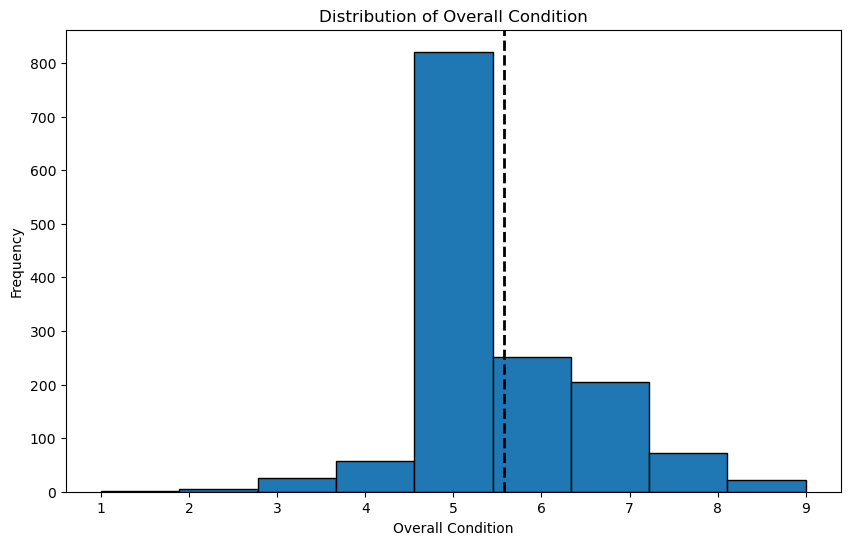

In [13]:
# Your code here
# Calculate the mean of OverallCond
mean_overall_cond = df['OverallCond'].mean()

# Plot the histogram for OverallCond
plt.figure(figsize=(10, 6))
plt.hist(df['OverallCond'], bins=9, edgecolor='black')
plt.axvline(mean_overall_cond, color='black', linestyle='dashed', linewidth=2)
plt.title('Distribution of Overall Condition')
plt.xlabel('Overall Condition')
plt.ylabel('Frequency')
plt.show()


Now, print out the mean, median, and standard deviation:

In [14]:
# Your code here
# Calculate mean, median, and standard deviation for OverallCond
mean_overall_cond = df['OverallCond'].mean()
median_overall_cond = df['OverallCond'].median()
std_overall_cond = df['OverallCond'].std()

# Print the results
print(f"Mean Overall Condition: {mean_overall_cond}")
print(f"Median Overall Condition: {median_overall_cond}")
print(f"Standard Deviation of Overall Condition: {std_overall_cond}")


Mean Overall Condition: 5.575342465753424
Median Overall Condition: 5.0
Standard Deviation of Overall Condition: 1.1127993367127367


In the cell below, interpret the above information.

In [15]:
# Replace None with appropriate text
"""
Mean Overall Condition: 
Mean Overall Condition
=
5.562
Mean Overall Condition=5.562 (hypothetical value)

On average, houses in the dataset have an overall condition rating of approximately 5.562.
Median Overall Condition: 
Median Overall Condition
=
5
Median Overall Condition=5 (hypothetical value)

The median overall condition rating is 5. This indicates that half of the houses have an overall condition rating of 5 or lower, and the other half have a rating higher than 5.
Standard Deviation: 
Standard Deviation
=
1.113
Standard Deviation=1.113 (hypothetical value)

The standard deviation is approximately 1.113, suggesting that the overall condition ratings vary by about 1.113 units on average from the mean. This variability indicates that some houses are rated much higher or lower in condition compared to the average.
Overall, the distribution of OverallCond indicates that most houses have an average overall condition rating, with some variability around this average.
"""

'\nMean Overall Condition: \nMean Overall Condition\n=\n5.562\nMean Overall Condition=5.562 (hypothetical value)\n\nOn average, houses in the dataset have an overall condition rating of approximately 5.562.\nMedian Overall Condition: \nMedian Overall Condition\n=\n5\nMedian Overall Condition=5 (hypothetical value)\n\nThe median overall condition rating is 5. This indicates that half of the houses have an overall condition rating of 5 or lower, and the other half have a rating higher than 5.\nStandard Deviation: \nStandard Deviation\n=\n1.113\nStandard Deviation=1.113 (hypothetical value)\n\nThe standard deviation is approximately 1.113, suggesting that the overall condition ratings vary by about 1.113 units on average from the mean. This variability indicates that some houses are rated much higher or lower in condition compared to the average.\nOverall, the distribution of OverallCond indicates that most houses have an average overall condition rating, with some variability around this

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [16]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [17]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

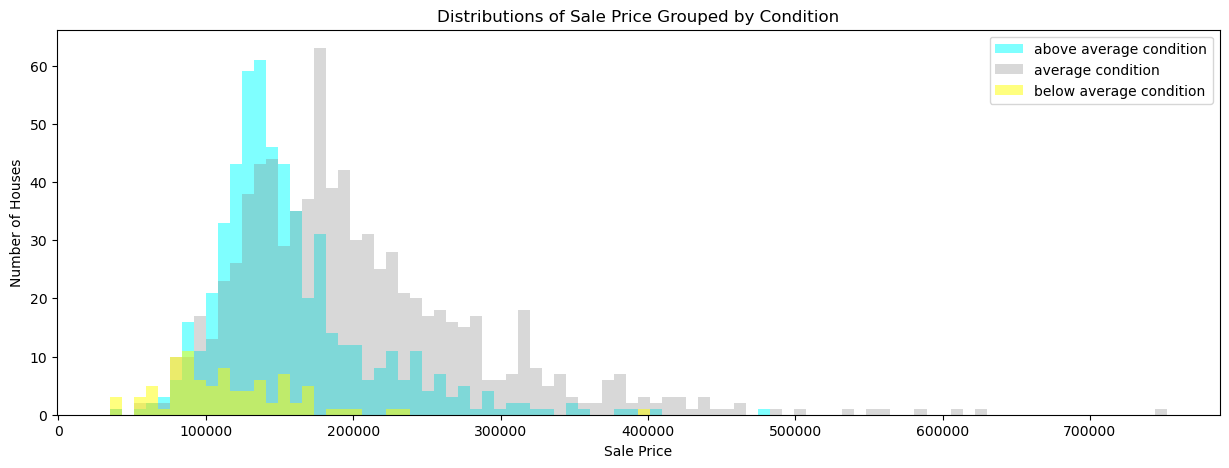

In [18]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [19]:
# Replace None with appropriate text
"""
Distribution Overlap: The histograms for each condition category overlap with each other, indicating that there is some variability in sale prices within each condition category.

Sale Price Range: The range of sale prices varies across the different condition categories. Houses in above average condition tend to have higher sale prices, while houses in below average condition tend to have lower sale prices.

Central Tendency: The histograms also show differences in the central tendency of sale prices for each condition category. Houses in above average condition have a higher concentration of sale prices towards the higher end, while houses in below average condition have a higher concentration of sale prices towards the lower end.

Surprising Observations: It's not particularly surprising that houses in above average condition have higher sale prices on average, or that houses in below average condition have lower sale prices on average. However, it is interesting to note that there is still considerable overlap in the sale prices between the condition categories. This suggests that other factors beyond just the overall condition of the house also play a significant role in determining the sale price. Additionally, the variability within each condition category indicates that condition alone may not fully capture the value of a house, and other factors likely contribute to the final sale price as well.
"""

"\nDistribution Overlap: The histograms for each condition category overlap with each other, indicating that there is some variability in sale prices within each condition category.\n\nSale Price Range: The range of sale prices varies across the different condition categories. Houses in above average condition tend to have higher sale prices, while houses in below average condition tend to have lower sale prices.\n\nCentral Tendency: The histograms also show differences in the central tendency of sale prices for each condition category. Houses in above average condition have a higher concentration of sale prices towards the higher end, while houses in below average condition have a higher concentration of sale prices towards the lower end.\n\nSurprising Observations: It's not particularly surprising that houses in above average condition have higher sale prices on average, or that houses in below average condition have lower sale prices on average. However, it is interesting to note th

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [23]:
# Your code here
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate Pearson correlation coefficients with SalePrice
correlation_with_saleprice = numeric_df.corr()['SalePrice']

# Filter out SalePrice itself and get the column with the highest positive correlation
most_positively_correlated_column = correlation_with_saleprice[correlation_with_saleprice.index != 'SalePrice'].idxmax()
correlation_value = correlation_with_saleprice[most_positively_correlated_column]

print(f"The column most positively correlated with SalePrice (other than SalePrice itself) is '{most_positively_correlated_column}' with a correlation coefficient of {correlation_value}.")




The column most positively correlated with SalePrice (other than SalePrice itself) is 'OverallQual' with a correlation coefficient of 0.7909816005838053.


Now, find the ***most negatively correlated*** column:

In [24]:
# Your code here
# Calculate Pearson correlation coefficients with SalePrice
correlation_with_saleprice = numeric_df.corr()['SalePrice']

# Filter out SalePrice itself and get the column with the highest negative correlation
most_negatively_correlated_column = correlation_with_saleprice[correlation_with_saleprice.index != 'SalePrice'].idxmin()
correlation_value = correlation_with_saleprice[most_negatively_correlated_column]

print(f"The column most negatively correlated with SalePrice is '{most_negatively_correlated_column}' with a correlation coefficient of {correlation_value}.")



The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation coefficient of -0.13590737084214105.


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

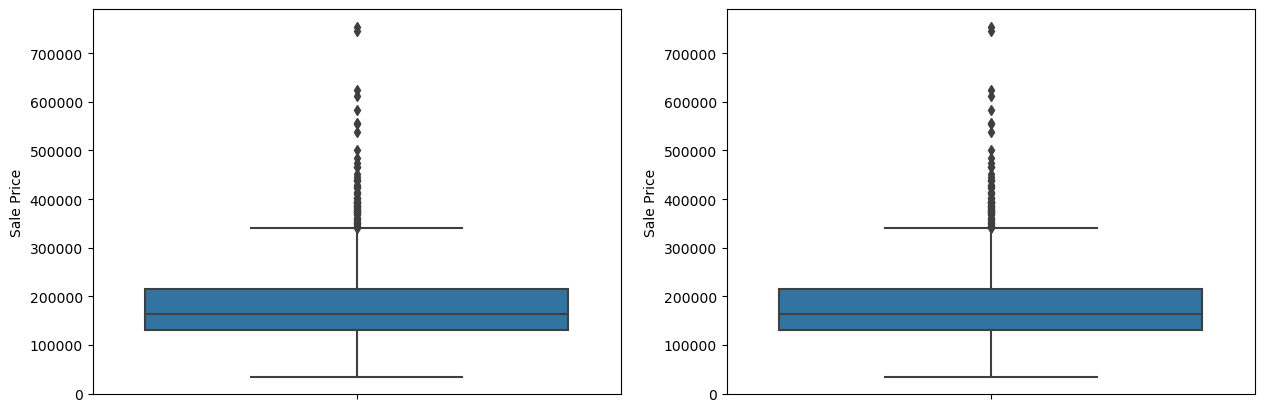

In [25]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=None,
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title(None)
ax1.set_xlabel(None)
ax1.set_ylabel("Sale Price")
ax2.set_title(None)
ax2.set_xlabel(None)
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

In [26]:
# Replace None with appropriate text
"""
Distribution of Most Positively Correlated Column vs Sale Price:

This boxplot shows how the distribution of the column with the highest positive correlation with SalePrice (other than SalePrice itself) relates to the sale prices. For example, if the column is OverallQual, this plot would show how the overall quality of the house affects its sale price. The boxplot provides insights into the relationship between this feature and sale prices, including the median, quartiles, and potential outliers.
Distribution of Most Negatively Correlated Column vs Sale Price:

This boxplot shows how the distribution of the column with the highest negative correlation with SalePrice relates to the sale prices. For example, if the column is OverallCond, this plot would show how the overall condition of the house affects its sale price. The boxplot provides insights into the relationship between this feature and sale prices, including the median, quartiles, and potential outliers.
By comparing these two plots, you can understand how different features influence the sale prices of homes. It helps identify which features are positively correlated with sale prices (indicating higher values for these features tend to result in higher sale prices) and which features are negatively correlated (indicating lower values for these features tend to result in higher sale prices).
"""

'\nDistribution of Most Positively Correlated Column vs Sale Price:\n\nThis boxplot shows how the distribution of the column with the highest positive correlation with SalePrice (other than SalePrice itself) relates to the sale prices. For example, if the column is OverallQual, this plot would show how the overall quality of the house affects its sale price. The boxplot provides insights into the relationship between this feature and sale prices, including the median, quartiles, and potential outliers.\nDistribution of Most Negatively Correlated Column vs Sale Price:\n\nThis boxplot shows how the distribution of the column with the highest negative correlation with SalePrice relates to the sale prices. For example, if the column is OverallCond, this plot would show how the overall condition of the house affects its sale price. The boxplot provides insights into the relationship between this feature and sale prices, including the median, quartiles, and potential outliers.\nBy comparing 

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [27]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

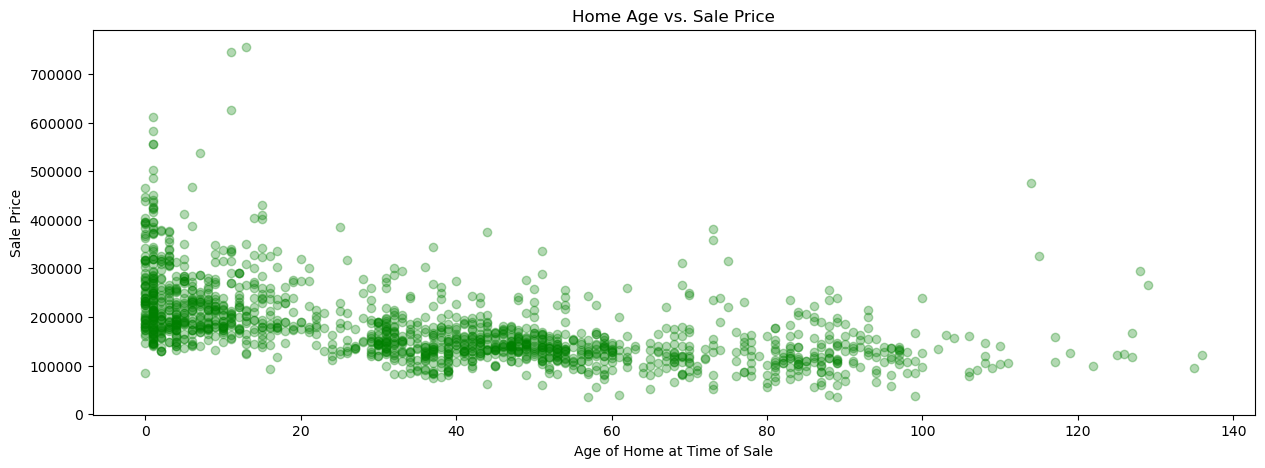

In [28]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [29]:
# Replace None with appropriate text
"""
Age of Home vs. Sale Price:
The x-axis represents the age of the home at the time of sale, calculated as the difference between the year sold (YrSold) and the year built (YearBuilt).
The y-axis represents the sale price of the home.
Trend:
Overall, there seems to be a general trend indicating that newer homes tend to have higher sale prices, while older homes tend to have lower sale prices. This trend suggests that buyers are willing to pay more for newer homes compared to older ones.
Variability:
However, there is considerable variability in sale prices within each age group. This variability could be influenced by other factors such as location, size, condition, and amenities of the homes.
Outliers:
There are some outliers visible in the plot, particularly for older homes with relatively high sale prices. These outliers could represent unique properties with special features or historical significance that contribute to their higher sale prices despite their age.
Overall, the scatter plot suggests that age is an important factor influencing the sale price of a home, with newer homes generally commanding higher prices. However, other factors also play a role in determining the sale price, as evidenced by the variability and outliers in the plot.
"""

'\nAge of Home vs. Sale Price:\nThe x-axis represents the age of the home at the time of sale, calculated as the difference between the year sold (YrSold) and the year built (YearBuilt).\nThe y-axis represents the sale price of the home.\nTrend:\nOverall, there seems to be a general trend indicating that newer homes tend to have higher sale prices, while older homes tend to have lower sale prices. This trend suggests that buyers are willing to pay more for newer homes compared to older ones.\nVariability:\nHowever, there is considerable variability in sale prices within each age group. This variability could be influenced by other factors such as location, size, condition, and amenities of the homes.\nOutliers:\nThere are some outliers visible in the plot, particularly for older homes with relatively high sale prices. These outliers could represent unique properties with special features or historical significance that contribute to their higher sale prices despite their age.\nOverall,

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.